In [416]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [417]:
penguin=pd.read_csv('penguins_lter.csv') # importing testing data

In [418]:
train=pd.read_csv('penguins_size.csv') # importing training data

In [419]:
penguin.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [420]:
len(penguin)

344

In [421]:
train.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [422]:
len(train)

344

In [423]:
penguin.isnull().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

**Renaming some columns**

In [424]:
penguin.rename(columns={'Delta 15 N (o/oo)':'D15','Delta 13 C (o/oo)':'D13','Culmen Length (mm)':'CulmenL','Culmen Depth (mm)':'CulmenD','Flipper Length (mm)':'FlipperL','Body Mass (g)':'Bodymass'},inplace=True)

**Imputing missing values with mean for D15 column**

In [425]:
import math
mean_d15=math.floor(penguin.D15.mean())
penguin.D15=penguin.D15.fillna(mean_d15)


**Imputing missing values with mean for D13 column**

In [426]:
mean_d13=math.floor(penguin.D13.mean())
penguin.D13=penguin.D13.fillna(mean_d13)

**Imputing missing values with mean for CulmenL column**

In [427]:
mean_cul=math.floor(penguin.CulmenL.mean())
penguin.CulmenL=penguin.CulmenL.fillna(mean_cul)

**Imputing missing values with mean for CulmenD**

In [428]:
mean_culmend=math.floor(penguin.CulmenD.mean())
penguin.CulmenD=penguin.CulmenD.fillna(mean_culmend)

**Imputing missing values with mean for FlipperL**

In [429]:
mean_flipper=math.floor(penguin.FlipperL.mean())
penguin.FlipperL=penguin.FlipperL.fillna(mean_flipper)

**Imputing missing values with mean for Bodymass column**

In [430]:
mean_bm=math.floor(penguin.Bodymass.mean())
penguin.Bodymass=penguin.Bodymass.fillna(mean_bm)

In [431]:
penguin.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,CulmenL,CulmenD,FlipperL,Bodymass,Sex,D15,D13,Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,8.00000,-26.00000,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,43.0,17.0,200.0,4201.0,NaN,8.00000,-26.00000,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


**Imputing missing values with most frequent entry for Sex column**

In [432]:
most_frequent=penguin.mode()['Sex'].values[0]
penguin.Sex.replace('.',most_frequent,inplace=True)
most_frequent

'MALE'

In [433]:
penguin.Sex.fillna(most_frequent,inplace=True)

In [434]:
penguin.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,CulmenL,CulmenD,FlipperL,Bodymass,Sex,D15,D13,Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,8.00000,-26.00000,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,43.0,17.0,200.0,4201.0,MALE,8.00000,-26.00000,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [435]:
penguin.isnull().sum()

studyName              0
Sample Number          0
Species                0
Region                 0
Island                 0
Stage                  0
Individual ID          0
Clutch Completion      0
Date Egg               0
CulmenL                0
CulmenD                0
FlipperL               0
Bodymass               0
Sex                    0
D15                    0
D13                    0
Comments             318
dtype: int64

**Exploratory Data Analysis**

In [436]:
penguin.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,CulmenL,CulmenD,FlipperL,Bodymass,Sex,D15,D13,Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,8.00000,-26.00000,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,43.0,17.0,200.0,4201.0,MALE,8.00000,-26.00000,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [437]:
penguin['Clutch Completion'].value_counts()

Yes    308
No      36
Name: Clutch Completion, dtype: int64

In [438]:
penguin['Island'].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: Island, dtype: int64

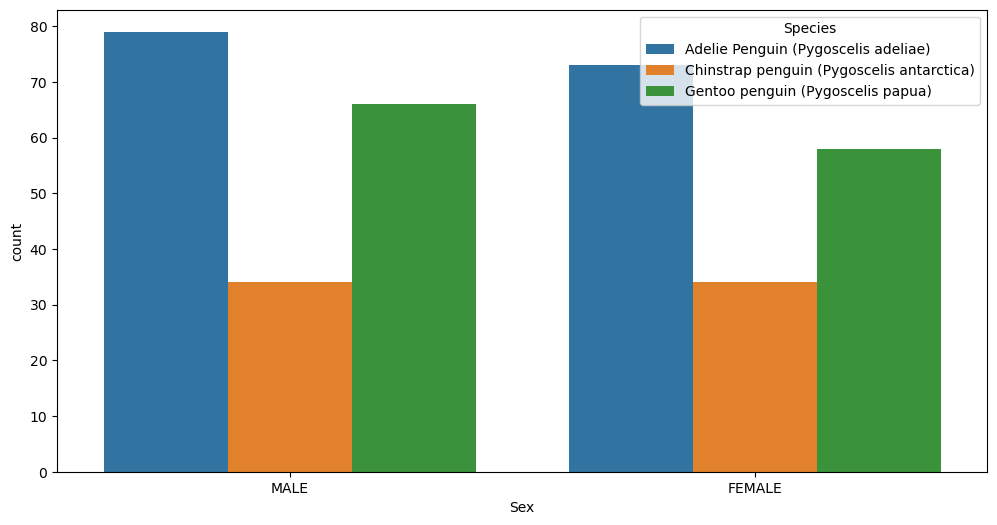

In [439]:
plt.figure(figsize=(12,6))
sns.countplot(x='Sex',data=penguin, hue='Species')
plt.show()

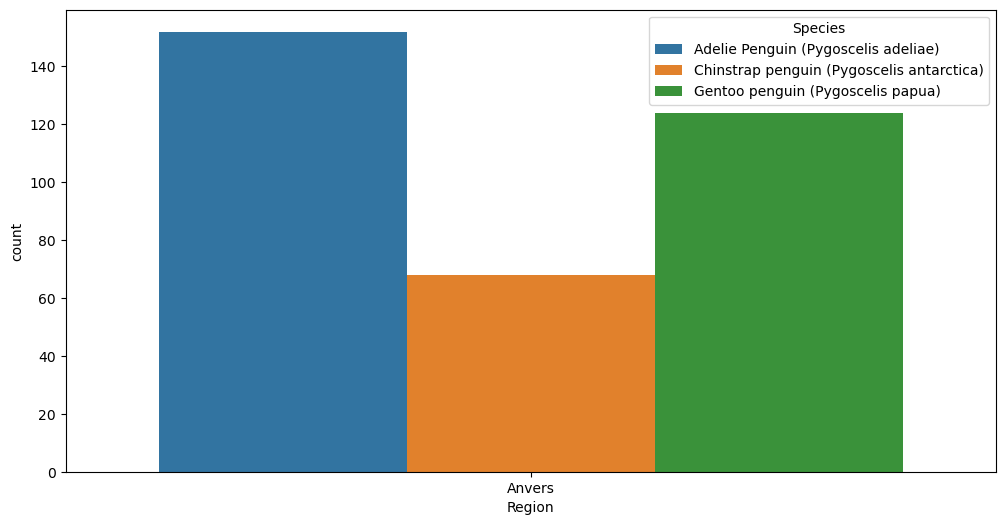

In [440]:
plt.figure(figsize=(12,6))
sns.countplot(x='Region',data=penguin,  hue='Species')
plt.show()

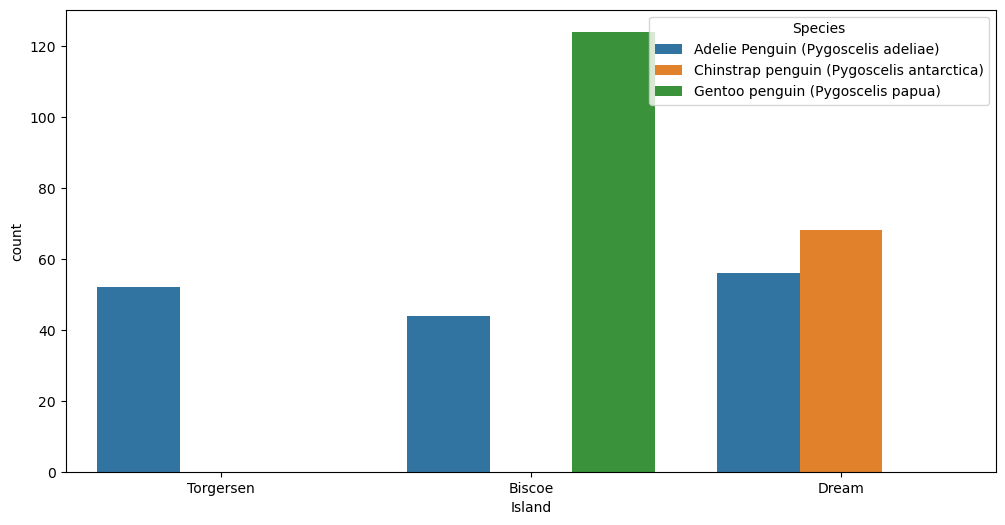

In [441]:
plt.figure(figsize=(12,6))
sns.countplot(x='Island',data=penguin, hue='Species')
plt.show()

**Removing unnecessary columns**

In [442]:
penguin=penguin.drop(['studyName','Sample Number','Region','Stage','Individual ID','Date Egg','Comments'],axis='columns')
penguin.head()

,Species,Island,Clutch Completion,CulmenL,CulmenD,FlipperL,Bodymass,Sex,D15,D13
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,39.1,18.7,181.0,3750.0,MALE,8.00000,-26.00000
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302
3,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,43.0,17.0,200.0,4201.0,MALE,8.00000,-26.00000
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426


In [443]:
penguin.rename(columns = {'Clutch Completion':'Clutch_completion'},inplace=True)

In [444]:
sex=pd.get_dummies(penguin.Sex)

In [445]:
island=pd.get_dummies(penguin.Island)

In [446]:
clutch = pd.get_dummies(penguin.Clutch_completion)

In [447]:
penguin = pd.concat([penguin,sex,island,clutch],axis=1)

In [448]:
penguin = penguin.drop(['FEMALE','Sex','Biscoe','Island','No','Clutch_completion'],axis='columns')

In [449]:
penguin.rename(columns = {'MALE':'gender','Yes':'clutch_completion'},inplace=True)

In [450]:
X=penguin.drop('Species',axis='columns')
y=penguin['Species']

In [451]:
penguin.head()

,Species,CulmenL,CulmenD,FlipperL,Bodymass,D15,D13,gender,Dream,Torgersen,clutch_completion
0,Adelie Penguin (Pygoscelis adeliae),39.1,18.7,181.0,3750.0,8.00000,-26.00000,1,0,1,1
1,Adelie Penguin (Pygoscelis adeliae),39.5,17.4,186.0,3800.0,8.94956,-24.69454,0,0,1,1
2,Adelie Penguin (Pygoscelis adeliae),40.3,18.0,195.0,3250.0,8.36821,-25.33302,0,0,1,1
3,Adelie Penguin (Pygoscelis adeliae),43.0,17.0,200.0,4201.0,8.00000,-26.00000,1,0,1,1
4,Adelie Penguin (Pygoscelis adeliae),36.7,19.3,193.0,3450.0,8.76651,-25.32426,0,0,1,1


In [452]:
from sklearn.model_selection import train_test_split

In [453]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [454]:
from sklearn.ensemble import RandomForestClassifier

In [455]:
rfc=RandomForestClassifier()

In [456]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [457]:
predictions=rfc.predict(X_test)

In [458]:
from sklearn.metrics import classification_report, confusion_matrix

In [459]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[42  0  0]
 [ 0 14  0]
 [ 0  0 30]]


                                           precision    recall  f1-score   support

      Adelie Penguin (Pygoscelis adeliae)       1.00      1.00      1.00        42
Chinstrap penguin (Pygoscelis antarctica)       1.00      1.00      1.00        14
        Gentoo penguin (Pygoscelis papua)       1.00      1.00      1.00        30

                                 accuracy                           1.00        86
                                macro avg       1.00      1.00      1.00        86
                             weighted avg       1.00      1.00      1.00        86



In [461]:
rfc.predict([[42,15.4,160,3500,7,20,1,0,1,1]])

C:\Users\SAURABH BANNAGARE\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['Adelie Penguin (Pygoscelis adeliae)'], dtype=object)